# Image Augmentation

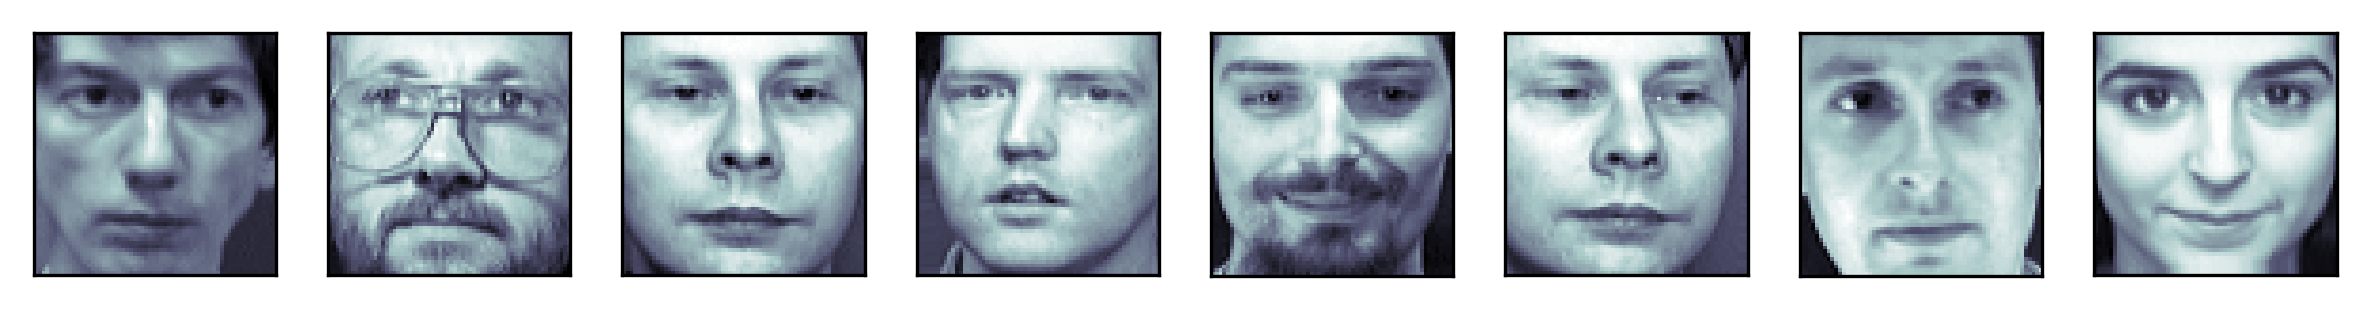

In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
mpl.rc('figure', dpi=300)
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

faces = fetch_olivetti_faces()
X_train0, X_test0, y_train0, y_test0 = train_test_split(faces.images, faces.target, test_size=0.4, random_state=0)
X_train = X_train0[:, :, :, np.newaxis]
X_test = X_test0[:, :, :, np.newaxis]
Y_train = np_utils.to_categorical(y_train0, 40)
Y_test = np_utils.to_categorical(y_test0, 40)

plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(X_train[i, :, :, 0], cmap=mpl.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

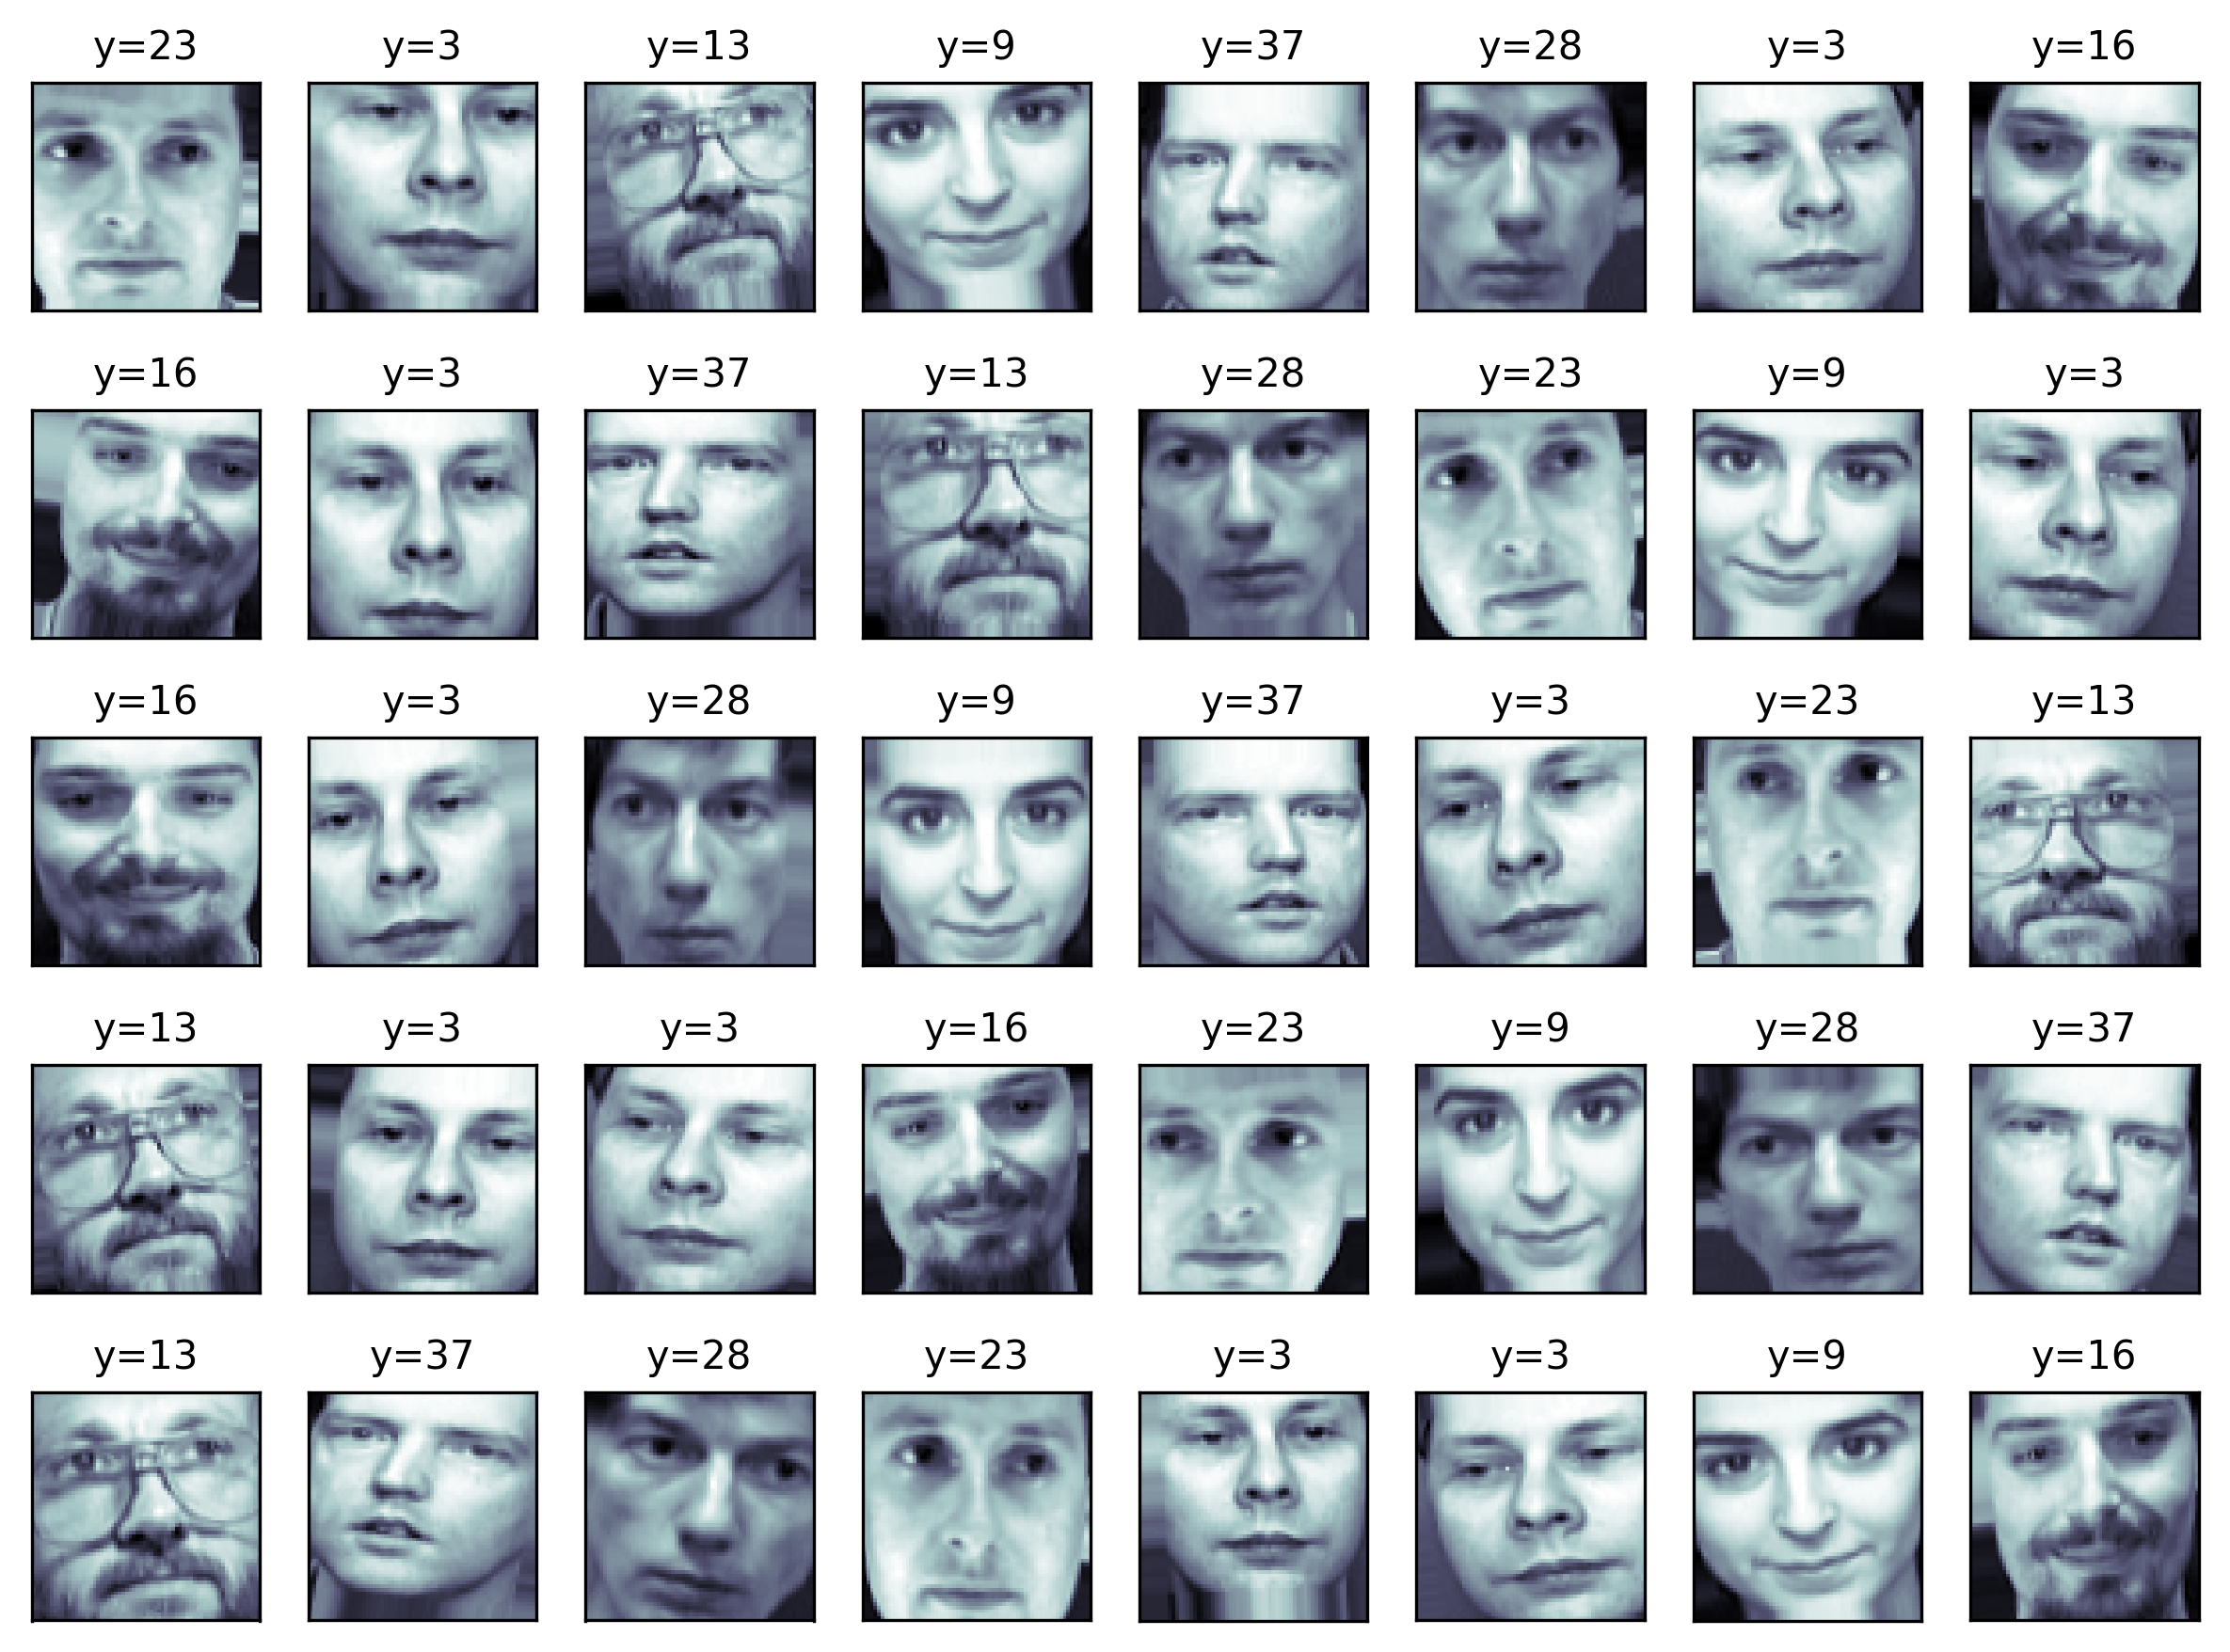

In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator.fit(X_train)

batch_size = 8
iterator = train_generator.flow(X_train[:batch_size], Y_train[:batch_size], batch_size=batch_size)

np.random.seed(0)
plt.figure(figsize=(8, 6))
for i in range(int(40 / batch_size)):
    x_augs, y_augs = iterator.next()
    for j in range(batch_size):
        plt.subplot(5, 8, batch_size * i + j + 1)
        plt.imshow(x_augs[j, :, :, 0], cmap=mpl.cm.bone)
        plt.title("y={}".format(np.argmax(y_augs[j, :])), fontsize=10)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

In [23]:
test_generator = ImageDataGenerator()

train_iterator = train_generator.flow(
    X_train, Y_train, batch_size=len(X_train))

N = 50
X_train_new = []
Y_train_new = []
for i in range(N):
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    Y_train_new.append(y_train_new)

X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

X_train_new.shape

(12000, 64, 64, 1)

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import *
from keras.regularizers import l2

from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import *

np.random.seed(0)
model = Sequential()
model.add(Conv2D(20, (4, 4), activation='relu', input_shape=(
    64, 64, 1), padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(50, (4, 4), activation='relu',
                 padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation='tanh', kernel_initializer="glorot_uniform"))
model.add(Dense(40, activation='softmax', kernel_initializer="glorot_uniform"))
model.compile(loss='categorical_crossentropy', metrics=[
              'accuracy'], optimizer=RMSprop())

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 20)        340       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 50)        16050     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 50)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)             0         
__________

In [27]:
%%time
hist1 = model.fit(X_train, Y_train, epochs=20, batch_size=120,
                  validation_data=(X_test, Y_test), verbose=2)

Train on 240 samples, validate on 160 samples
Epoch 1/20
 - 6s - loss: 4.3695 - acc: 0.0125 - val_loss: 3.8257 - val_acc: 0.0125
Epoch 2/20
 - 0s - loss: 3.8620 - acc: 0.0292 - val_loss: 3.6873 - val_acc: 0.0375
Epoch 3/20
 - 0s - loss: 3.6595 - acc: 0.0625 - val_loss: 3.6860 - val_acc: 0.0813
Epoch 4/20
 - 0s - loss: 3.6151 - acc: 0.1125 - val_loss: 3.6736 - val_acc: 0.0875
Epoch 5/20
 - 0s - loss: 3.5853 - acc: 0.0958 - val_loss: 3.6501 - val_acc: 0.0750
Epoch 6/20
 - 0s - loss: 3.4891 - acc: 0.1083 - val_loss: 3.6089 - val_acc: 0.0625
Epoch 7/20
 - 0s - loss: 3.3922 - acc: 0.0917 - val_loss: 3.5334 - val_acc: 0.1188
Epoch 8/20
 - 0s - loss: 3.2932 - acc: 0.2125 - val_loss: 3.3984 - val_acc: 0.1500
Epoch 9/20
 - 0s - loss: 3.1823 - acc: 0.2917 - val_loss: 3.4755 - val_acc: 0.0375
Epoch 10/20
 - 0s - loss: 3.1560 - acc: 0.1708 - val_loss: 3.1448 - val_acc: 0.3375
Epoch 11/20
 - 0s - loss: 2.7481 - acc: 0.4417 - val_loss: 3.0450 - val_acc: 0.3125
Epoch 12/20
 - 0s - loss: 2.8729 - acc:

In [28]:
%%time
hist2 = model.fit(X_train_new, Y_train_new, epochs=20,
                  batch_size=120, validation_data=(X_test, Y_test), verbose=2)

Train on 12000 samples, validate on 160 samples
Epoch 1/20
 - 1s - loss: 1.8818 - acc: 0.5332 - val_loss: 0.8273 - val_acc: 0.8188
Epoch 2/20
 - 1s - loss: 0.7476 - acc: 0.8373 - val_loss: 0.4605 - val_acc: 0.8937
Epoch 3/20
 - 1s - loss: 0.3704 - acc: 0.9257 - val_loss: 0.3321 - val_acc: 0.9187
Epoch 4/20
 - 1s - loss: 0.2041 - acc: 0.9628 - val_loss: 0.1851 - val_acc: 0.9375
Epoch 5/20
 - 1s - loss: 0.1392 - acc: 0.9746 - val_loss: 0.1645 - val_acc: 0.9437
Epoch 6/20
 - 1s - loss: 0.0867 - acc: 0.9841 - val_loss: 0.2053 - val_acc: 0.9437
Epoch 7/20
 - 1s - loss: 0.0582 - acc: 0.9899 - val_loss: 0.1756 - val_acc: 0.9313
Epoch 8/20
 - 1s - loss: 0.0579 - acc: 0.9888 - val_loss: 0.1959 - val_acc: 0.9375
Epoch 9/20
 - 1s - loss: 0.0357 - acc: 0.9926 - val_loss: 0.1566 - val_acc: 0.9625
Epoch 10/20
 - 1s - loss: 0.0268 - acc: 0.9957 - val_loss: 0.1590 - val_acc: 0.9562
Epoch 11/20
 - 1s - loss: 0.0300 - acc: 0.9943 - val_loss: 0.1399 - val_acc: 0.9562
Epoch 12/20
 - 1s - loss: 0.0158 - ac

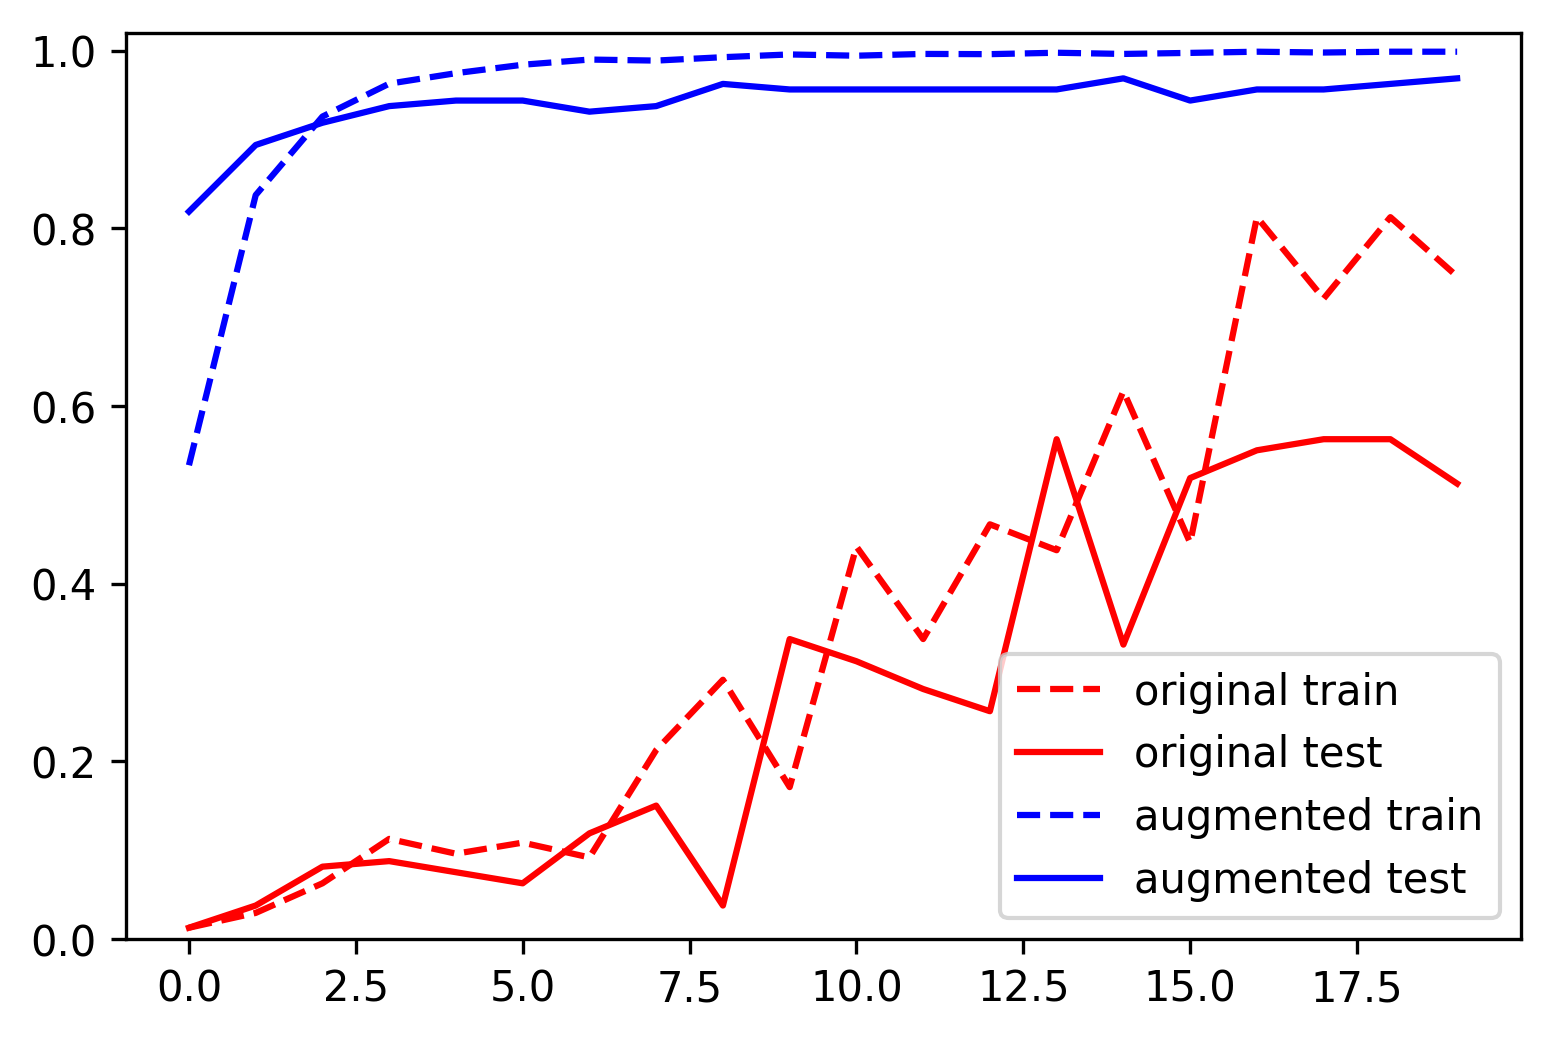

In [29]:
plt.plot(hist1.history['acc'], 'r--', label="original train")
plt.plot(hist1.history['val_acc'], 'r-', label="original test")
plt.plot(hist2.history['acc'], 'b--', label="augmented train")
plt.plot(hist2.history['val_acc'], 'b-', label="augmented test")
plt.ylim(0, 1.02)
plt.legend()
plt.show()